In [1]:
from robyn.modeling.clustering.clustering_config import ClusteringConfig, ClusterBy
from robyn.modeling.clustering.cluster_builder import ClusterBuilder
from robyn.modeling.entities.pareto_result import ParetoResult
from robyn.data.entities.enums import DependentVarType
import logging
# Set the log level to DEBUG
import os
import logging
log_level = os.environ.get('LOG_LEVEL', 'INFO')
logging.basicConfig(level=getattr(logging, log_level.upper()))


In [2]:

import pickle
# load the variable from the file
with open("pareto_result.pkl", "rb") as f:
    pareto_result: ParetoResult = pickle.load(f)
with open("mmmdata.pkl", "rb") as f:
    mmm_data = pickle.load(f)


In [3]:
cluster_builder = ClusterBuilder(pareto_result=pareto_result)

2024-11-13 02:51:23 - robyn.modeling.clustering.cluster_builder - INFO - Initializing ClusterBuilder
2024-11-13 02:51:23 - robyn.modeling.clustering.cluster_builder - INFO - ClusterBuilder initialization complete


In [4]:
configs = ClusteringConfig(
    dep_var_type= DependentVarType(mmm_data.mmmdata_spec.dep_var_type),
    cluster_by = ClusterBy.HYPERPARAMETERS,
    max_clusters = 10,
    min_clusters = 3,
    weights=[1.0, 1.0, 1.0]
)
cluster_results  = cluster_builder.cluster_models(configs)

2024-11-13 02:51:23 - robyn.modeling.clustering.cluster_builder - INFO - Starting model clustering process
2024-11-13 02:51:23 - robyn.modeling.clustering.cluster_builder - INFO - Clustering by: ClusterBy.HYPERPARAMETERS
2024-11-13 02:51:23 - robyn.modeling.clustering.cluster_builder - INFO - Starting optimal cluster selection
2024-11-13 02:51:23 - robyn.modeling.clustering.cluster_builder - INFO - Ignored features: pareto, sol_id, nrmse_train, decomp.rssd, mape, nrmse, nrmse_val, nrmse_test
2024-11-13 02:51:23 - robyn.modeling.clustering.cluster_builder - INFO - Starting WSS calculation for 30 clusters
2024-11-13 02:51:23 - robyn.modeling.clustering.cluster_builder - INFO - Selected optimal number of clusters: 6
2024-11-13 02:51:23 - robyn.modeling.clustering.cluster_builder - INFO - Selected 6 clusters
2024-11-13 02:51:23 - robyn.modeling.clustering.cluster_builder - INFO - Ignored features: pareto, sol_id, nrmse_train, decomp.rssd, mape, nrmse, nrmse_val, nrmse_test
2024-11-13 02:51

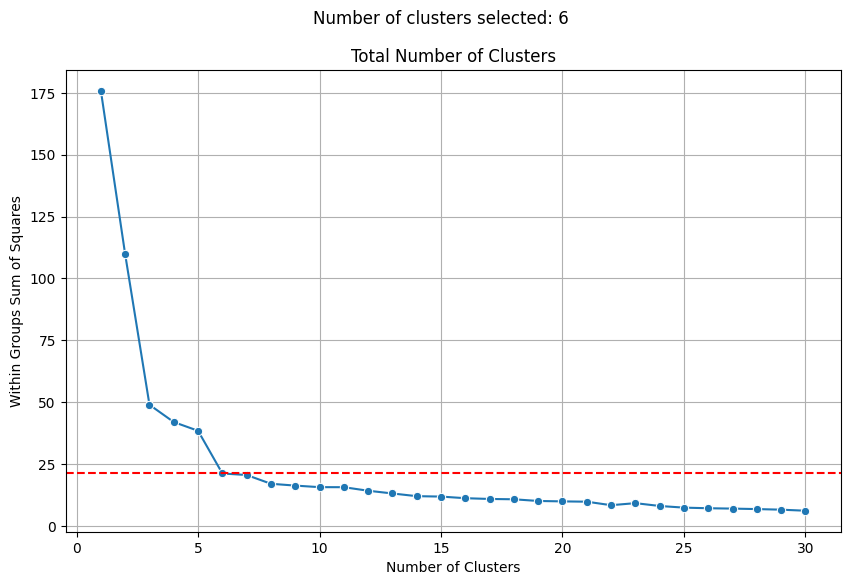

In [5]:
cluster_results.wss

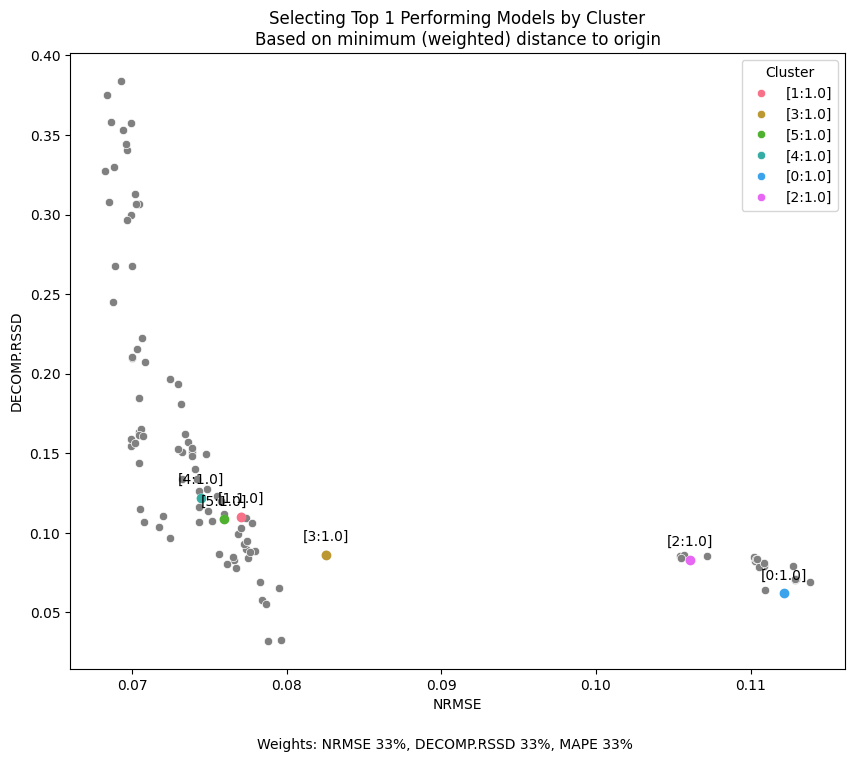

In [6]:
cluster_results.plots.top_solutions_errors_plot

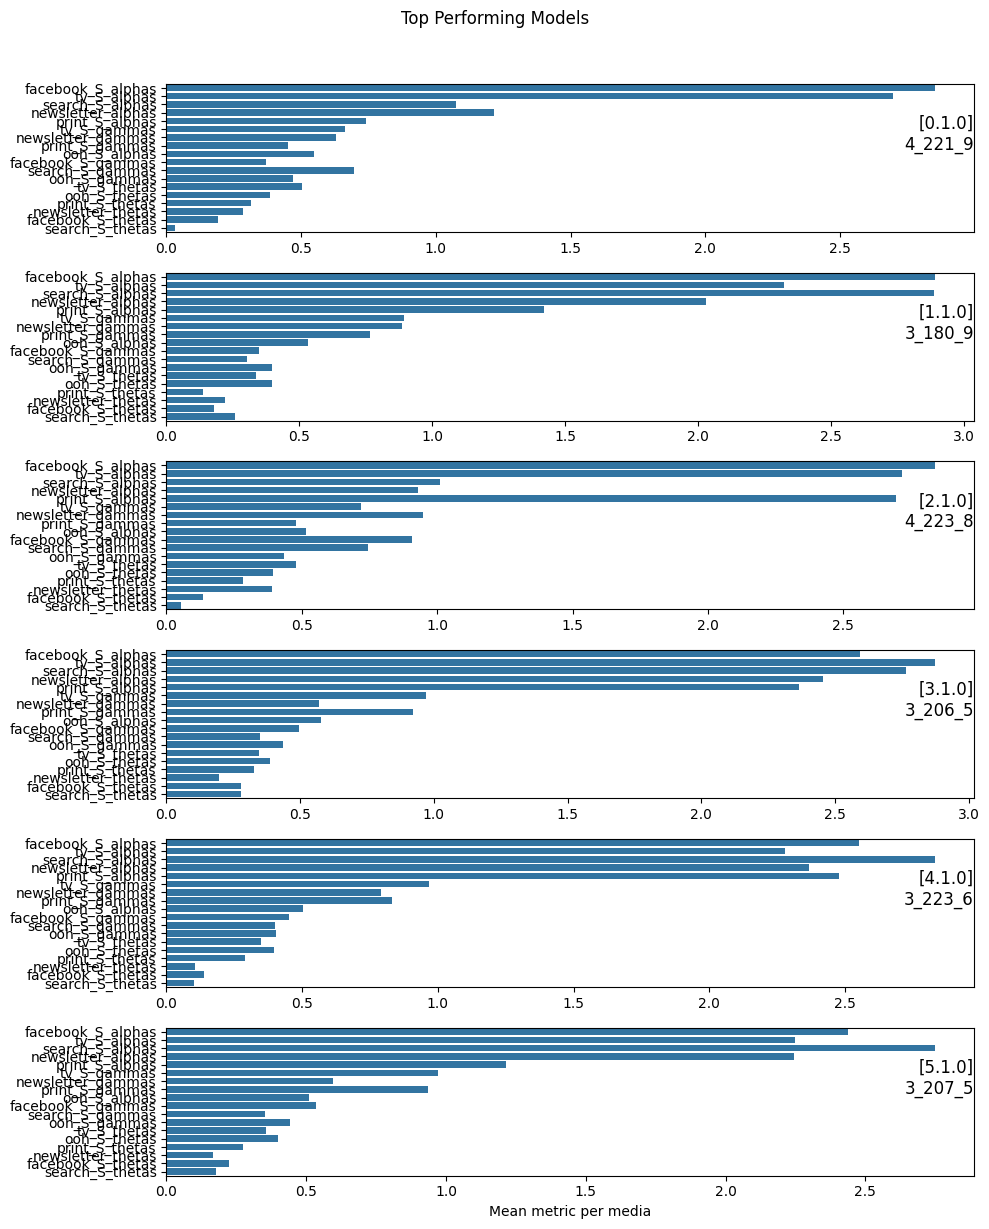

In [7]:
cluster_results.plots.top_solutions_rois_plot

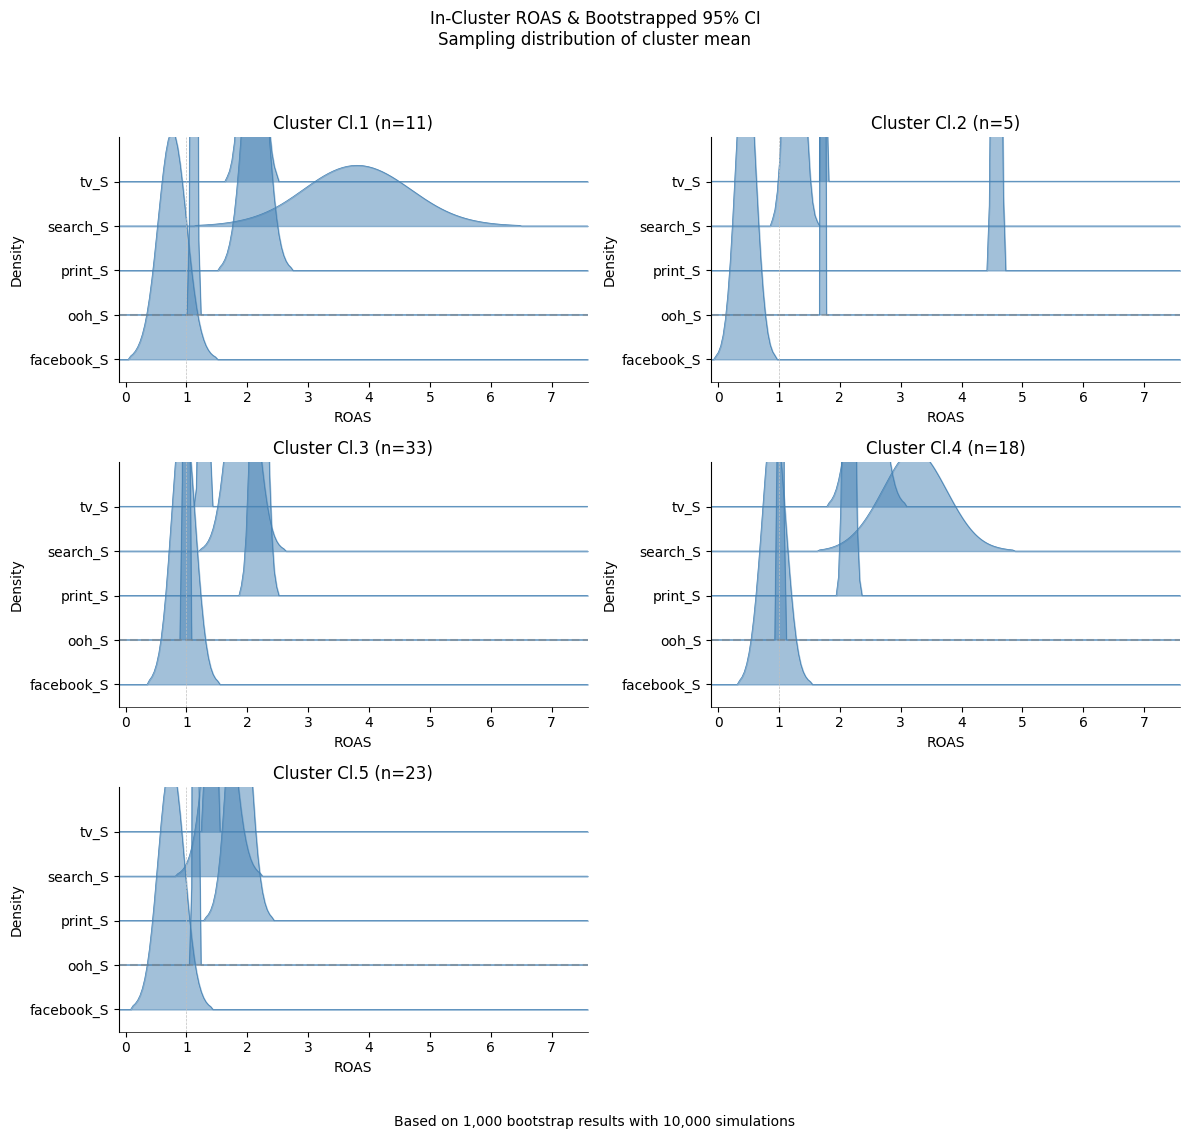

In [8]:
cluster_results.cluster_ci.clusters_confidence_interval_plot

In [9]:
cluster_results.cluster_ci.cluster_confidence_interval_df

,rn,cluster,n,boot_mean,boot_se,boot_ci,ci_low,ci_up,sd,dist100
0,facebook_S,1,11,0.764120,0.208713,"[0.00, 2.31]",0.000000,2.308031,0.660009,0.036647
1,facebook_S,2,5,0.451885,0.144695,"[0.00, 1.35]",0.000000,1.350373,0.289391,0.019486
2,facebook_S,3,33,0.948424,0.171005,"[0.00, 2.95]",0.000000,2.949547,0.967349,0.049336
3,facebook_S,4,18,0.915860,0.173908,"[0.00, 2.49]",0.000000,2.485419,0.717040,0.039591
4,facebook_S,5,23,0.750434,0.189886,"[0.00, 2.64]",0.000000,2.638963,0.890646,0.044649
5,ooh_S,1,11,1.125818,0.027952,"[0.92, 1.33]",0.919394,1.332525,0.088393,0.005959
6,ooh_S,2,5,1.719441,0.014333,"[1.63, 1.81]",1.631016,1.808979,0.028665,0.002377
7,ooh_S,3,33,0.995955,0.024763,"[0.71, 1.29]",0.705985,1.285509,0.140082,0.008684
8,ooh_S,4,18,1.027855,0.022630,"[0.83, 1.23]",0.826639,1.231775,0.093307,0.005977
9,ooh_S,5,23,1.151704,0.021534,"[0.94, 1.37]",0.937205,1.365565,0.101005,0.006367


In [10]:
cluster_results.clusters_means

,cluster,facebook_S_alphas,facebook_S_gammas,facebook_S_thetas,newsletter_alphas,newsletter_gammas,newsletter_thetas,ooh_S_alphas,ooh_S_gammas,ooh_S_thetas,...,print_S_gammas,print_S_thetas,search_S_alphas,search_S_gammas,search_S_thetas,tv_S_alphas,tv_S_gammas,tv_S_thetas,mape.qt10,n
0,0,2.825280,0.574825,0.129237,1.374639,0.772016,0.285814,0.528188,0.447083,0.384169,...,0.446693,0.281682,1.077938,0.725470,0.022202,2.469808,0.801965,0.441781,1.0,16
1,1,2.697652,0.432009,0.149361,2.616411,0.857461,0.227383,0.561700,0.390089,0.389980,...,0.824343,0.197201,2.792703,0.407736,0.120611,2.041597,0.924271,0.345055,1.0,11
2,2,2.832403,0.917978,0.059741,1.126950,0.914925,0.378617,0.515370,0.415786,0.394712,...,0.489852,0.286458,1.011785,0.706419,0.049939,2.692784,0.722511,0.480438,1.0,5
3,3,2.707356,0.445729,0.172383,2.620452,0.836872,0.188745,0.575215,0.377688,0.369471,...,0.792980,0.243918,2.813223,0.392802,0.210757,2.679880,0.939689,0.361441,1.0,33
4,4,2.661356,0.400905,0.144438,2.632961,0.933995,0.190471,0.564547,0.348610,0.362267,...,0.764043,0.274272,2.820154,0.376304,0.110257,1.927493,0.904554,0.381515,1.0,18
5,5,2.505985,0.537093,0.179258,2.517725,0.789090,0.164693,0.536616,0.445431,0.386943,...,0.882397,0.211319,2.674026,0.421197,0.190489,2.622092,0.929958,0.397860,1.0,23


In [11]:
print("clusters: ", cluster_results.n_clusters,
"\nerror weights/balance: ", cluster_results.errors_weights,
"\nboot_n: ", cluster_results.cluster_ci.boot_n,
"\nsim_n: ", cluster_results.cluster_ci.sim_n)


clusters:  6 
error weights/balance:  [1.0, 1.0, 1.0] 
boot_n:  1000 
sim_n:  10000


In [12]:
cluster_results.cluster_data


,sol_id,facebook_S_alphas,facebook_S_gammas,facebook_S_thetas,newsletter_alphas,newsletter_gammas,newsletter_thetas,ooh_S_alphas,ooh_S_gammas,ooh_S_thetas,...,nrmse_train,nrmse_val,nrmse_test,nrmse,decomp.rssd,mape,mape.qt10,cluster,n,top_sol
5568,3_173_7,2.717322,0.402709,0.297180,2.737876,0.579805,0.307251,0.636390,0.386876,0.382628,...,0.053768,0.070476,0.105029,0.070476,0.306571,0,True,1,11,False
5627,3_180_3,2.154442,0.372595,0.243124,2.376930,0.642197,0.376372,0.593215,0.492018,0.395943,...,0.053822,0.073613,0.103504,0.073613,0.157137,0,True,1,11,False
5633,3_180_9,2.891648,0.348037,0.177320,2.030443,0.887021,0.219310,0.530774,0.396265,0.398475,...,0.053522,0.077060,0.105183,0.077060,0.110274,0,True,1,11,True
5663,3_184_3,2.707797,0.333065,0.152867,2.662821,0.977179,0.191877,0.564223,0.344065,0.363503,...,0.053485,0.068888,0.109510,0.068888,0.267737,0,True,4,18,False
5692,3_187_5,2.438434,0.536240,0.222022,2.245774,0.594021,0.168094,0.517885,0.441894,0.397328,...,0.053551,0.075942,0.102350,0.075942,0.111992,0,True,5,23,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7936,4_213_8,2.839757,0.907439,0.051793,1.101422,0.908414,0.389811,0.518169,0.461330,0.393483,...,0.058903,0.105684,0.045543,0.105684,0.086236,0,True,2,5,False
7982,4_218_9,2.823896,0.585418,0.179179,1.396024,0.863346,0.316070,0.537893,0.490737,0.375767,...,0.056599,0.110431,0.041961,0.110431,0.083532,0,True,0,16,False
7996,4_220_5,2.839757,0.907439,0.051793,1.101422,0.908414,0.389811,0.515836,0.433093,0.394410,...,0.058902,0.105497,0.045757,0.105497,0.084269,0,True,2,5,False
8009,4_221_9,2.854097,0.368210,0.191915,1.217258,0.629336,0.285062,0.548132,0.470806,0.383425,...,0.055835,0.112174,0.039758,0.112174,0.061977,0,True,0,16,True


In [16]:
cluster_results.top_solutions['sol_id']

8009    4_221_9
5633    3_180_9
8026    4_223_8
5863    3_206_5
6017    3_223_6
5872    3_207_5
Name: sol_id, dtype: object